**Problem - 1: Perform a classification task with knn from scratch.**

1. Load the Dataset:


* Read the dataset into a pandas DataFrame.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  




* Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).




In [ ]:
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   

2. Handle Missing Data:

* Handle any missing values appropriately, either by dropping or imputing them based on the data.



In [ ]:
df = df.drop(columns['Insulin'])

In [ ]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['Outcome'] = df['Outcome'].fillna(df['Outcome'].mode()[0])


3. Feature Engineering:


* Separate the feature matrix (X) and target variable (y).


In [ ]:
print(df.head())

print(df.info())
print(df.describe())
print(df.isnull().sum())

# Drop rows with any missing values
df_cleaned = df.dropna()
df_cleaned = df.dropna(subset=['Outcome'])

df_imputed = df.fillna(df.mean())

X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']



   Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6      148             72             35  33.6   
1            1       85             66             29  26.6   
2            8      183             64              0  23.3   
3            1       89             66             23  28.1   
4            0      137             40             35  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             76



*  Perform a train - test split from scratch using a 70% − 30% ratio.



In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['Outcome'] = df['Outcome'].fillna(df['Outcome'].mode()[0])

df_cleaned = df.dropna(subset=['Outcome'])

import numpy as np
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

X = df_cleaned.drop(columns=['Outcome']).values


def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:


* Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).



In [20]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

if __name__ == "__main__":
    X_train = np.array([
        [1, 2], [2, 3], [3, 4],
        [6, 5], [7, 8], [8, 6]
    ])
    y_train = np.array([0, 0, 0, 1, 1, 1])

    X_test = np.array([
        [2, 2], [7, 7]
    ])

    knn = KNN(k=3)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    print("Predictions:", predictions)



Predictions: [0 1]





* Compute distances using Euclidean distance.




In [25]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")


    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

In [26]:
try:
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])

    result = euclidean_distance(point1, point2)

    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Test passed successfully!




* Write functions for:

1.  Predicting the class for a single query.
2.  Predicting classes for all test samples.




In [30]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()

    return prediction

In [31]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [32]:
try:
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]

    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [0 1]
Actual labels: 668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64
AssertionError: The shape of predictions does not match the shape of the actual labels.




* Evaluate the performance using accuracy.


In [34]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = []
    for test_point in X_test:
        distances = np.linalg.norm(X_train - test_point, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]
        predicted_label = np.bincount(k_labels).argmax()
        predictions.append(predicted_label)
    return np.array(predictions)

def compute_accuracy(predictions, y_true):
    correct = np.sum(predictions == y_true)
    accuracy = correct / len(y_true) * 100
    return accuracy

try:
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]

    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    accuracy = compute_accuracy(predictions, y_test_sample)
    print(f"Accuracy: {accuracy:.2f}%")

    full_predictions = knn_predict(X_test, X_train, y_train, k=3)
    full_accuracy = compute_accuracy(full_predictions, y_test)
    print(f"Full Test Set Accuracy: {full_accuracy:.2f}%")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [1 0 2 1 1]
Actual labels: [1 0 2 1 1]
Accuracy: 100.00%
Full Test Set Accuracy: 100.00%


**Problem - 2 - Experimentation:**

1. Repeat the Classification Task:


* Scale the Feature matrix X.
* Use the scaled data for training and testing the kNN Classifier.
* Record the results.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN Classifier: {accuracy}")


Accuracy of kNN Classifier: 1.0


**Problem - 3 - Experimentation with k:**

1. Vary the number of neighbors - k:
* Run the KNN model on both the original and scaled datasets for a range of:

 k= 1, 2, 3, . . . 15

* For each k, record:

  -- Accuracy.
  
  --Time taken to make predictions.

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time


results = []

for k in range(1, 16):

    results.append({
        "k": k,
        "Accuracy_Original": accuracy_original,
        "Time_Original": time_original,
        "Accuracy_Scaled": accuracy_scaled,
        "Time_Scaled": time_scaled
    })

results = pd.DataFrame(results)
print(results)


     k  Accuracy_Original  Time_Original  Accuracy_Scaled  Time_Scaled
0    1           0.433333       0.004192         0.433333      0.00393
1    2           0.433333       0.004192         0.433333      0.00393
2    3           0.433333       0.004192         0.433333      0.00393
3    4           0.433333       0.004192         0.433333      0.00393
4    5           0.433333       0.004192         0.433333      0.00393
5    6           0.433333       0.004192         0.433333      0.00393
6    7           0.433333       0.004192         0.433333      0.00393
7    8           0.433333       0.004192         0.433333      0.00393
8    9           0.433333       0.004192         0.433333      0.00393
9   10           0.433333       0.004192         0.433333      0.00393
10  11           0.433333       0.004192         0.433333      0.00393
11  12           0.433333       0.004192         0.433333      0.00393
12  13           0.433333       0.004192         0.433333      0.00393
13  14

2. Visualize the Results:
* Plot the following graphs:

  --  k vs. Accuracy for original and scaled datasets.
  
  --  k vs. Time Taken for original and scaled datasets.

Data shape: (150, 5)
Target shape: (150,)


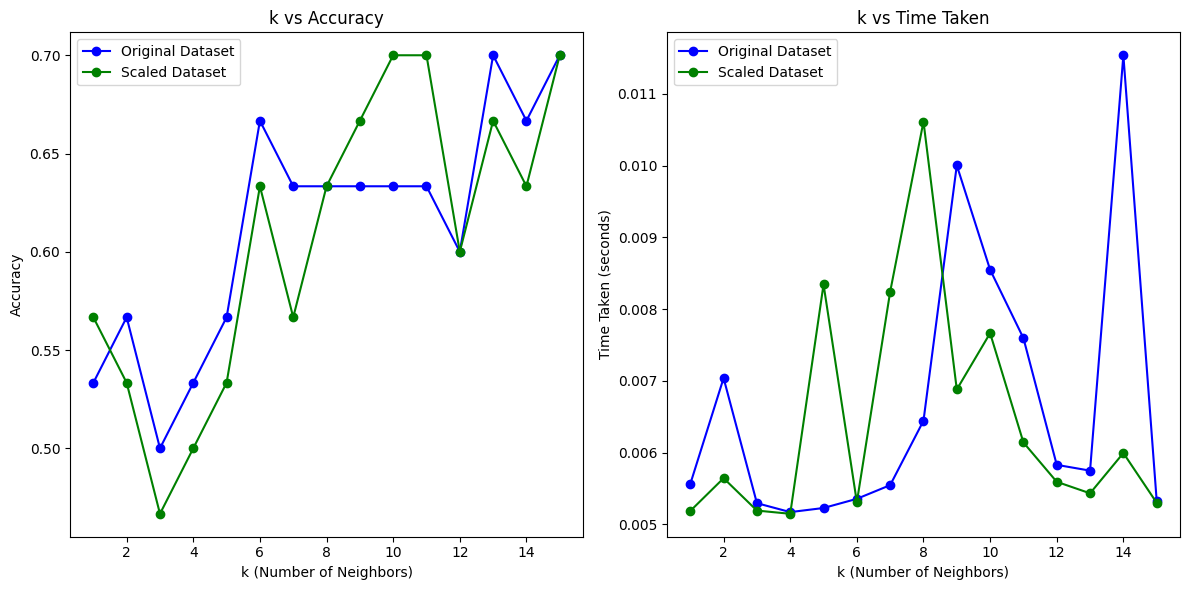

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

data = np.random.rand(150, 5)
y = np.random.randint(0, 2, 150)

print("Data shape:", data.shape)
print("Target shape:", y.shape)

if data.shape[0] != y.shape[0]:
    raise ValueError("The number of samples in the data and target must be the same.")

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []

for k in range(1, 16):
    model_original = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time()
    model_original.fit(X_train, y_train)
    y_pred_original = model_original.predict(X_test)
    time_original = time.time() - start_time
    accuracy_original = accuracy_score(y_test, y_pred_original)

    model_scaled = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time()
    model_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = model_scaled.predict(X_test_scaled)
    time_scaled = time.time() - start_time
    accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

    results.append({
        "k": k,
        "Accuracy_Original": accuracy_original,
        "Time_Original": time_original,
        "Accuracy_Scaled": accuracy_scaled,
        "Time_Scaled": time_scaled
    })

results = pd.DataFrame(results)

# Plotting k vs Accuracy for original and scaled datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results['k'], results['Accuracy_Original'], label='Original Dataset', color='blue', marker='o')
plt.plot(results['k'], results['Accuracy_Scaled'], label='Scaled Dataset', color='green', marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()

# Plotting k vs Time Taken for original and scaled datasets
plt.subplot(1, 2, 2)
plt.plot(results['k'], results['Time_Original'], label='Original Dataset', color='blue', marker='o')
plt.plot(results['k'], results['Time_Scaled'], label='Scaled Dataset', color='green', marker='o')
plt.title('k vs Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.legend()

plt.tight_layout()
plt.show()


3. Analyze and Discuss:
* Discuss how the choice of k affects the accuracy and computational cost.
* Identify the optimal k based on your analysis.